In [1]:
import requests
import pandas as pd
import numpy as np

In [2]:
# Request fear and greed index data for cryptocurrency using API
r = requests.get('https://api.alternative.me/fng/?limit=0')

In [3]:
# Create a data frame
df = pd.DataFrame(r.json()['data'])

In [4]:
df

,value,value_classification,timestamp,time_until_update
0,71,Greed,1713830400,55138
1,73,Greed,1713744000,NaN
2,72,Greed,1713657600,NaN
3,66,Greed,1713571200,NaN
4,66,Greed,1713484800,NaN
...,...,...,...,...
2266,11,Extreme Fear,1517788800,NaN
2267,24,Extreme Fear,1517702400,NaN
2268,40,Fear,1517616000,NaN
2269,15,Extreme Fear,1517529600,NaN


In [5]:
# Convert the 'value' column to integer
df.value = df.value.astype(int)

In [6]:
# Convert the timestamp to more readable time stamp
df.timestamp = pd.to_datetime(df.timestamp, unit='s')

C:\Users\adeol\AppData\Local\Temp\ipykernel_48428\360729489.py:2: FutureWarning: The behavior of 'to_datetime' with 'unit' when parsing strings is deprecated. In a future version, strings will be parsed as datetime strings, matching the behavior without a 'unit'. To retain the old behavior, explicitly cast ints or floats to numeric type before calling to_datetime.
  df.timestamp = pd.to_datetime(df.timestamp, unit='s')


In [7]:
df

,value,value_classification,timestamp,time_until_update
0,71,Greed,2024-04-23,55138
1,73,Greed,2024-04-22,NaN
2,72,Greed,2024-04-21,NaN
3,66,Greed,2024-04-20,NaN
4,66,Greed,2024-04-19,NaN
...,...,...,...,...
2266,11,Extreme Fear,2018-02-05,NaN
2267,24,Extreme Fear,2018-02-04,NaN
2268,40,Fear,2018-02-03,NaN
2269,15,Extreme Fear,2018-02-02,NaN


In [8]:
# Replacing the index with the 'timestamp' column
df.set_index('timestamp', inplace=True)

In [9]:
df

,value,value_classification,time_until_update
timestamp,,,
2024-04-23,71,Greed,55138
2024-04-22,73,Greed,NaN
2024-04-21,72,Greed,NaN
2024-04-20,66,Greed,NaN
2024-04-19,66,Greed,NaN
...,...,...,...
2018-02-05,11,Extreme Fear,NaN
2018-02-04,24,Extreme Fear,NaN
2018-02-03,40,Fear,NaN


<Axes: xlabel='timestamp'>

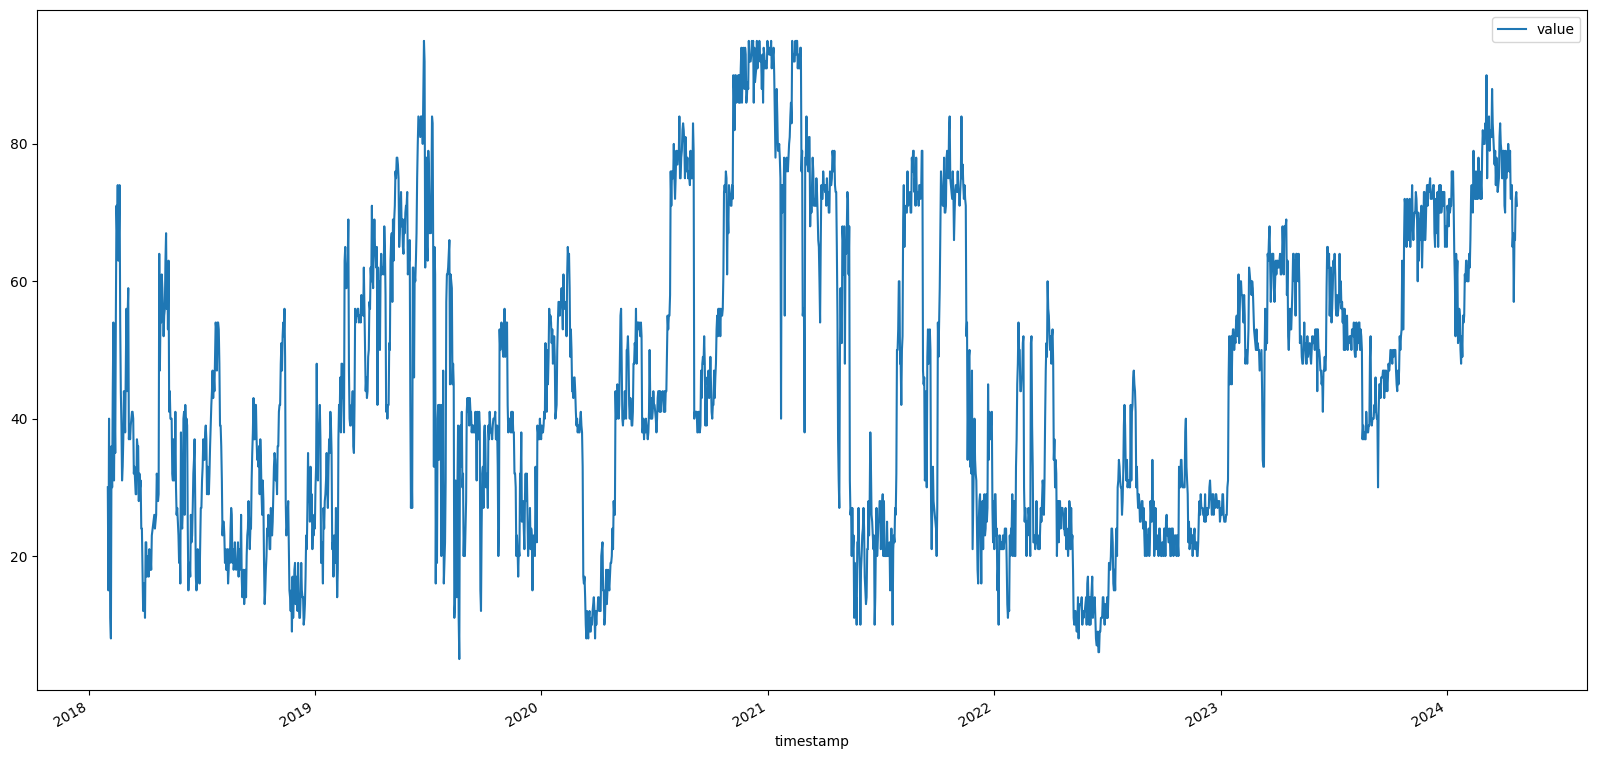

In [10]:
df.plot(figsize=(20,10))

In [11]:
# Arranging the rows in ascending order according to the timestamp
df = df[::-1]

In [12]:
df

,value,value_classification,time_until_update
timestamp,,,
2018-02-01,30,Fear,NaN
2018-02-02,15,Extreme Fear,NaN
2018-02-03,40,Fear,NaN
2018-02-04,24,Extreme Fear,NaN
2018-02-05,11,Extreme Fear,NaN
...,...,...,...
2024-04-19,66,Greed,NaN
2024-04-20,66,Greed,NaN
2024-04-21,72,Greed,NaN


In [13]:
# Changing a column name
df.rename(columns={'value': 'FGI_value'}, inplace=True)

In [14]:
df

,FGI_value,value_classification,time_until_update
timestamp,,,
2018-02-01,30,Fear,NaN
2018-02-02,15,Extreme Fear,NaN
2018-02-03,40,Fear,NaN
2018-02-04,24,Extreme Fear,NaN
2018-02-05,11,Extreme Fear,NaN
...,...,...,...
2024-04-19,66,Greed,NaN
2024-04-20,66,Greed,NaN
2024-04-21,72,Greed,NaN


In [15]:
df.to_csv("FearGreedIndex_bitcoin.csv")